In [1]:
import mysql.connector

In [49]:
import pandas as pd
import numpy as np

In [ ]:
#creating a connection from mysql

In [3]:
# performing data mining process
con=mysql.connector.connect(host="localhost",user="root",password="abhinav795",database="empdb")

In [4]:
# reading sql query
df=pd.read_sql_query('select * from studmarks',con)

In [5]:
df

,name,gender,DOB,maths,physics,chemistry,english,biology,economics,history,civics
0,john,m,1988-04-05,55,45,56,87,21,52,89,65
1,suresh,m,1987-05-04,75,96,78,64,90,61,58,2
2,ramesh,m,1989-05-25,25,54,89,76,95,87,56,74
3,jessica,f,1990-08-12,78,96,86,63,54,89,75,45
4,jennifer,f,1989-09-02,58,96,78,46,96,77,83,53
5,anu,f,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,f,1987-05-04,55,61,64,58,75,58,64,61
7,ritesh,m,1989-05-25,54,76,87,56,25,56,76,87
8,farha,f,1990-08-12,55,63,89,75,78,75,63,89
9,mukesh,m,1989-09-02,96,46,77,83,58,83,46,77


In [6]:
#now performing exploratory data analysis

In [7]:
df.columns

Index(['name', 'gender', 'DOB', 'maths', 'physics', 'chemistry', 'english',
       'biology', 'economics', 'history', 'civics'],
      dtype='object')

In [8]:
#checking data type of each column
df.dtypes

name         object
gender       object
DOB          object
maths         int64
physics       int64
chemistry     int64
english       int64
biology       int64
economics     int64
history       int64
civics        int64
dtype: object

In [9]:
x=df.iloc[:,3:]

In [10]:
x

,maths,physics,chemistry,english,biology,economics,history,civics
0,55,45,56,87,21,52,89,65
1,75,96,78,64,90,61,58,2
2,25,54,89,76,95,87,56,74
3,78,96,86,63,54,89,75,45
4,58,96,78,46,96,77,83,53
5,45,87,52,89,55,89,87,52
6,55,61,64,58,75,58,64,61
7,54,76,87,56,25,56,76,87
8,55,63,89,75,78,75,63,89
9,96,46,77,83,58,83,46,77


In [15]:
#checking whether any null value is present or not
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   maths      10 non-null     int64
 1   physics    10 non-null     int64
 2   chemistry  10 non-null     int64
 3   english    10 non-null     int64
 4   biology    10 non-null     int64
 5   economics  10 non-null     int64
 6   history    10 non-null     int64
 7   civics     10 non-null     int64
dtypes: int64(8)
memory usage: 768.0 bytes


In [16]:
x.shape

(10, 8)

In [11]:
x.describe()

,maths,physics,chemistry,english,biology,economics,history,civics
count,10.000000,10.00000,10.0000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.00000,75.6000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.81666,13.6886,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.00000,52.0000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,55.75000,67.2500,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,69.50000,78.0000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.75000,86.7500,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.00000,89.0000,89.000000,96.000000,89.000000,89.000000,89.0000


In [13]:
x.skew()

maths        0.246964
physics     -0.003695
chemistry   -0.800630
english     -0.131222
biology     -0.496446
economics   -0.245555
history     -0.131222
civics      -1.332448
dtype: float64

In [12]:
#data visualization 

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

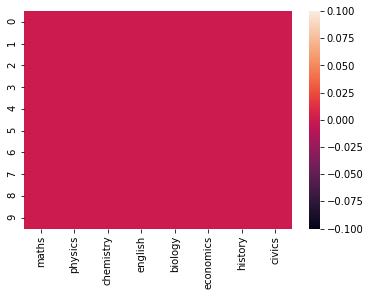

In [45]:
sns.heatmap(x.isnull())  #no null value is present

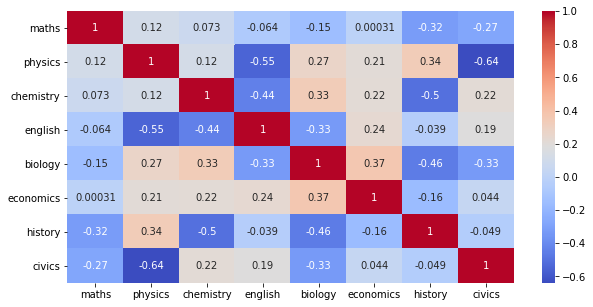

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')

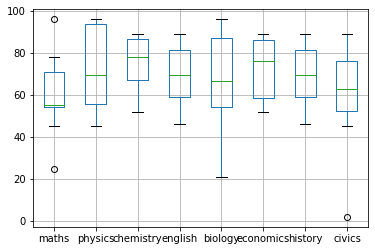

<Figure size 720x1080 with 0 Axes>

In [22]:
x.boxplot()
plt.figure(figsize=(10,15))
plt.show()

<BarContainer object of 10 artists>

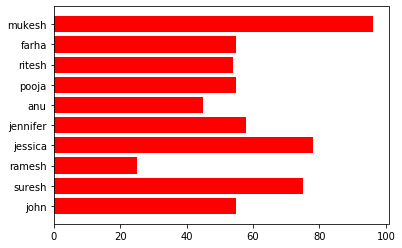

In [41]:
plt.barh(df["name"],df["maths"],color='red')

<BarContainer object of 10 artists>

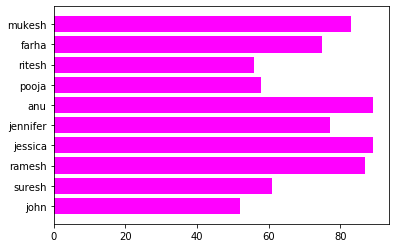

In [43]:
plt.barh(df["name"],df["economics"],color='magenta')

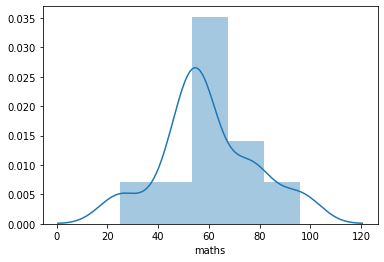

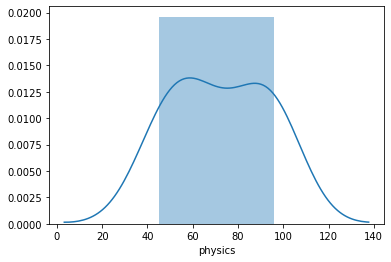

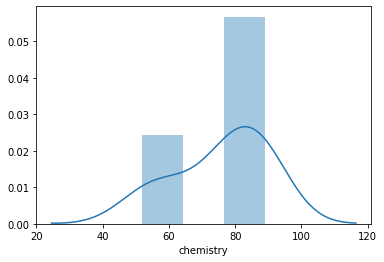

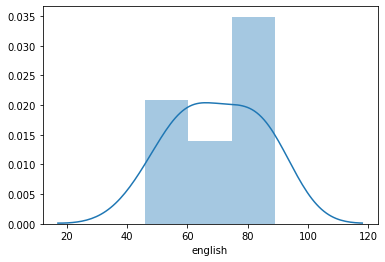

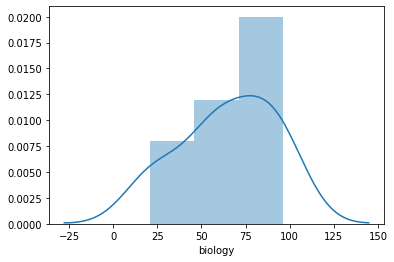

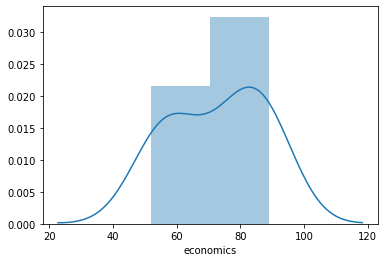

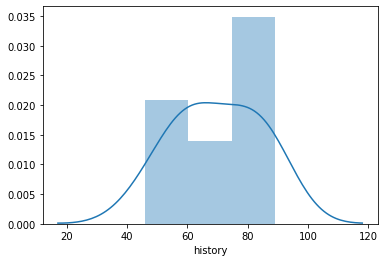

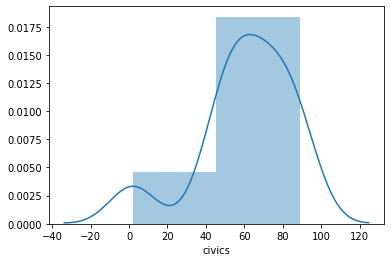

In [31]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

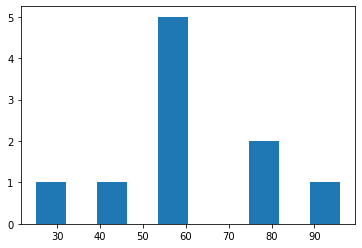

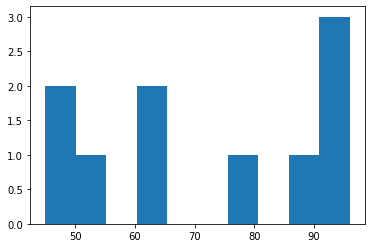

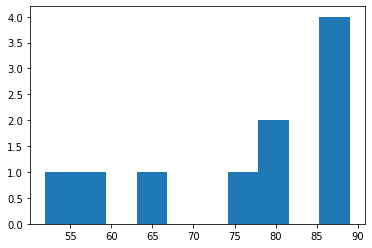

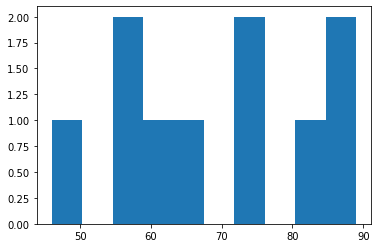

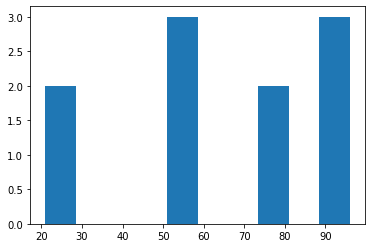

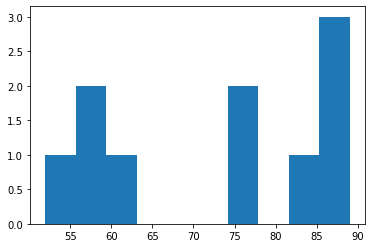

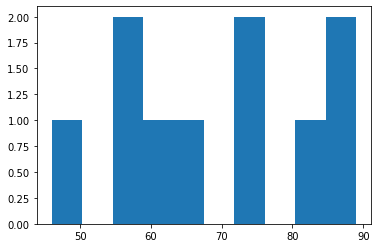

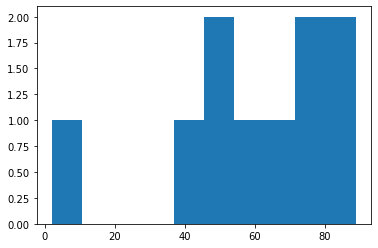

In [36]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

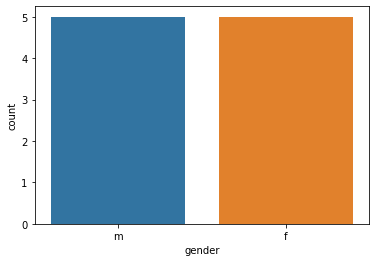

In [38]:
sns.countplot(df["gender"])

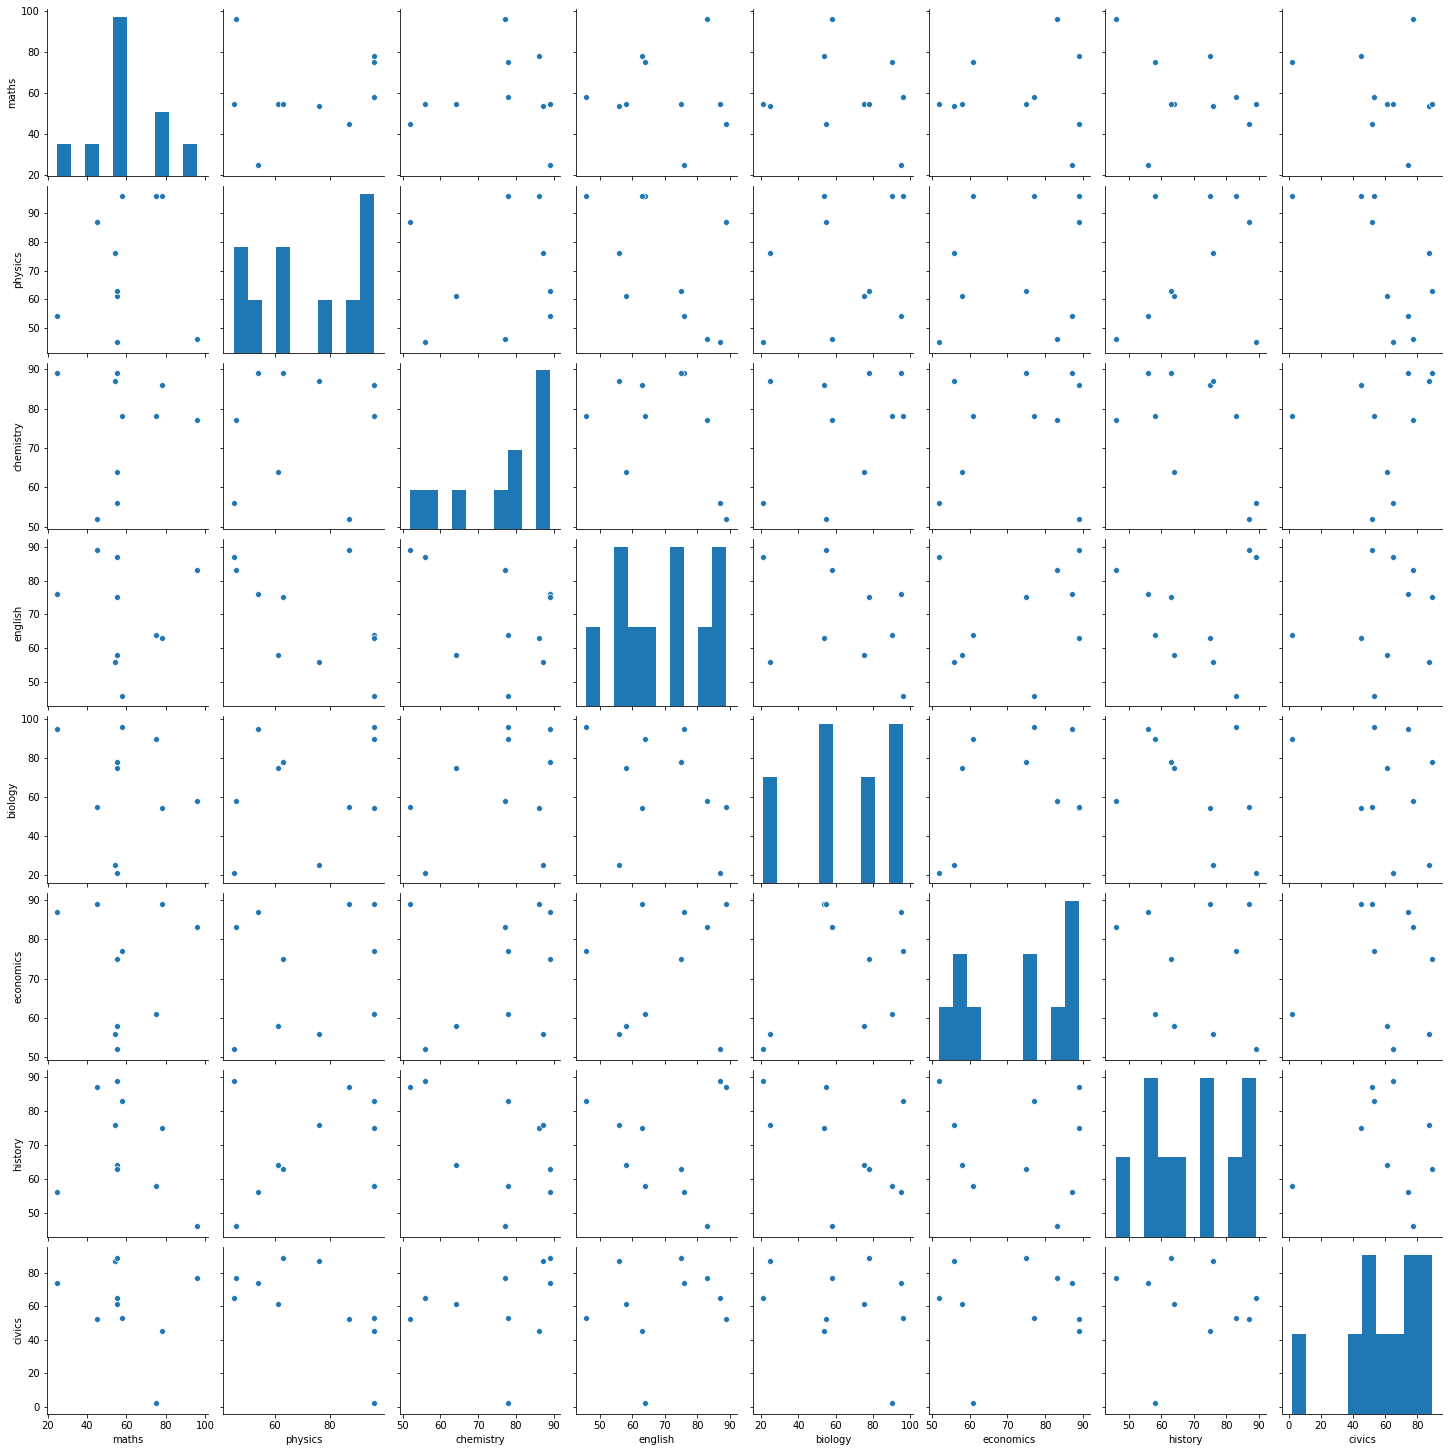

In [39]:
sns.pairplot(x)

In [46]:
#removing outliers from the data

In [48]:
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(x))

In [72]:
threshold=1.5
print(np.where(z>1.5))

(array([0, 0, 1, 2, 4, 5, 7, 9, 9], dtype=int64), array([2, 4, 7, 0, 3, 2, 4, 0, 6], dtype=int64))


In [77]:
#removing outliers from the above data
x_new=x[(z<1.5).all(axis=1)]

In [78]:
x_new.shape

(3, 8)

In [79]:
x.shape

(10, 8)